In [1]:
import pandas as pd
from IPython.display import display
# pd.options.display.float_format = '{:,.2%}'.format
import numpy as np
from matplotlib.ticker import ScalarFormatter

from matplotlib import pyplot as plt
import seaborn as sns

# df = pd.read_csv('summary.csv', names=['ga', 'problem', 'ell', 'nfe_mean', 'nfe_std'], skiprows=1)
df = pd.read_csv('summary.csv', names=['ga', 'problem', 'ell', 'gen_mean', 'gen_std', 'nfe_mean', 'nfe_std', 'rm_mean', 'rm_std', 'bm_mean', 'bm_std'], skiprows=1)
df = df[df['ga'] != 'dsmga2-tos-ftf_mfN']
df = df[df['ga'] != 'dsmga2-tos-ftf_cntN']
df['rm_ratio'] = df['rm_mean'] / df['nfe_mean']
df['bm_ratio'] = df['bm_mean'] / df['nfe_mean']
df['rm_to_bm'] = df['rm_mean'] / df['bm_mean']

In [4]:
# P_list = ['four_five_six', 'three_four_five_six_seven']
# P_list = ['ftrap', 'ftrap4', 'ftrap6']
# P_list = ['linear_mktrap', 'exponential_mktrap']
P_list = ['sat']
# df[(df['problem'].isin(P_list)) & (df['ga'].isin(['FFF', 'FTF_CG'])) & (df['ell']==100)].sort_values('nfe_mean')
df[(df['ga'].isin(['FFF', 'FTF_CE', 'FTF_CG'])) & (df['ell']==400) & (df['problem']=='cyctrap')].sort_values('problem')

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
105,FTF_CG,cyctrap,400,2.51,0.254755,115436.060,22134.410043,2804.74,202.882272,25774.720,5147.903197,0.024297,0.223281,0.108817
133,FTF_CE,cyctrap,400,1.70,0.328024,104108.446,13338.807377,5530.31,842.636936,22548.536,3112.150274,0.053121,0.216587,0.245262
263,FFF,cyctrap,400,1.12,0.124900,117590.520,13182.347200,4527.73,576.801924,23960.590,2640.497106,0.038504,0.203763,0.188966


In [3]:
df[(df['ga'].isin(['FFF', 'FTF_CG'])) & (df['ell']==400) & (df['problem']=='nk')].sort_values('problem')

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
120,FTF_CG,nk,400,30.824,15.673124,689457.127,320665.671622,230076.862,123213.582915,311812.265,163600.932205,0.333707,0.452258,0.737870
293,FFF,nk,400,14.134,5.564786,678819.897,325380.772927,268708.402,151231.101140,279369.455,146478.429931,0.395846,0.411552,0.961839


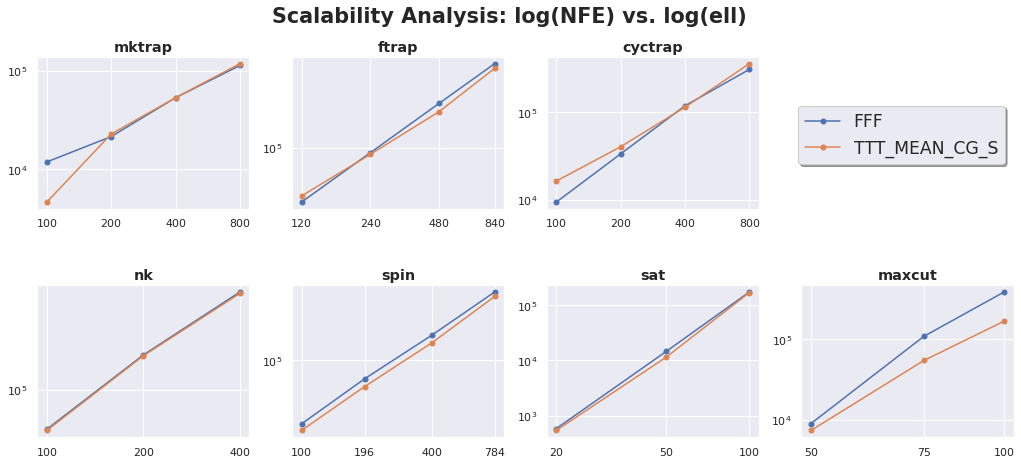

In [5]:
sns.set()
# print(plt.style.available)
# plt.style.use('seaborn-ticks')

def plot_scalability(problem, ga_list):
    global df

    problem_to_ells = {
        'mktrap': [100, 200, 400, 800],
        'ftrap': [120, 240, 480, 840],
        'cyctrap': [100, 200, 400, 800],
        'nk': [100, 200, 400], # 800
        'spin': [100, 196, 400, 784],
        'sat': [20, 50, 100], # 200
        'maxcut': [50, 75, 100]
    }
    
    plt.figure(figsize=(8, 6))
    for ga in ga_list:
        df_tmp = df[(df['ga']==ga) & (df['problem'] == problem) & (df['ell'].isin(problem_to_ells[problem]))]
        df_tmp = df_tmp.sort_values(by='ell', ascending=True)
        x = df_tmp['ell'].values
        y = df_tmp['nfe_mean'].values
        plt.plot(x, y, marker='.', markersize=10, label=ga)
        plt.yscale("log")
    
    plt.title(problem)
    plt.legend()
    plt.show()
    plt.close()

def plot_scalability_ax(problem, ga_list, ax):
    global df

    problem_to_ells = {
        'mktrap': [100, 200, 400, 800],
        'ftrap': [120, 240, 480, 840],
        'cyctrap': [100, 200, 400, 800],
        'nk': [100, 200, 400], # 800
        'spin': [100, 196, 400, 784],
        'sat': [20, 50, 100], # 200
        'maxcut': [50, 75, 100]
    }

    ax.set_title(problem, fontsize='large', weight='bold')
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.loglog()
    ax.set_xticks(problem_to_ells[problem])
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.minorticks_off()
    
    for ga in ga_list:
        df_tmp = df[(df['ga']==ga) & (df['problem'] == problem) & (df['ell'].isin(problem_to_ells[problem]))]
        df_tmp = df_tmp.sort_values(by='ell', ascending=True)
        x = df_tmp['ell'].values
        y = df_tmp['nfe_mean'].values
        ax.plot(x, y, marker='.', markersize=10, label=ga)
        # ax.loglog()
        
    # plt.show()
    # plt.close()

# plot_scalability(problem='mktrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])

scale = 7
fig, axes = plt.subplots(2, 4, figsize=(2.5*scale, 1*scale))
plot_scalability_ax(ax=axes[0, 0], problem='mktrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[0, 1], problem='ftrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[0, 2], problem='cyctrap', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 0], problem='nk', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 1], problem='spin', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 2], problem='sat', ga_list=['FFF', 'TTT_MEAN_CG_S'])
plot_scalability_ax(ax=axes[1, 3], problem='maxcut', ga_list=['FFF', 'TTT_MEAN_CG_S'])
axes[0, 3].axis('off')
handles, labels = axes[1, 3].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, fontsize='x-large', bbox_to_anchor=(0.5, 0.3, 0.4, 0.5))
fig.suptitle('Scalability Analysis: log(NFE) vs. log(ell)', fontsize='xx-large', weight='bold')
fig.subplots_adjust(hspace=0.5)
plt.savefig('ablation', dpi=300)
plt.show()
plt.close()

In [5]:
def examine(problem, ell, ga=None, neat=False):
    global df
    cond = np.logical_and(df['problem'] == problem, df['ell'] == ell)
    
    if ga:
        all_ga_list = df[cond]['ga'].values
        selected_ga_list = []
        # patter_list = [re.compile(x) for x in ga]
        for x in all_ga_list:
            # for pattern in patter_list:
            for pattern in ga:
                # if pattern.match(x):
                if pattern in x:
                    selected_ga_list.append(x)
                    break
        
        cond = np.logical_and(cond, df['ga'].isin(selected_ga_list))
    
    res = df[cond].sort_values('nfe_mean', ignore_index=True)
    if neat:
        res['nfe_mean'] = (res['nfe_mean'] // 1000).astype(int)
        res['nfe_std'] = (res['nfe_std'] // 1000).astype(int)
    return res

In [6]:
res_list = []

# P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven', 'linear_mktrap', 'exponential_mktrap']
P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven']
for P in P_list:
    X = df[df['ga'].isin(['FFF', 'TFF_MEAN', 'FTF_CG']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
    columns = X['ga'].values
    A = X['nfe_mean'].values
    B = X[X['ga']=='FFF']['nfe_mean'].values
    # res_list.append((A - B) / B)
    res_list.append((A//1000).astype(int))
res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
res_df.reset_index(inplace=True)
res_df.columns = ['problem'] + list(columns)
display(res_df)

,problem,FFF,FTF_CG,TFF_MEAN
0,mktrap,14,13,13
1,four_five_six,17,36,18
2,three_four_five_six_seven,45,51,46


In [19]:
with pd.option_context('display.float_format', '{:,.2%}'.format):
    res_list = []

    # P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven', 'linear_mktrap', 'exponential_mktrap']
    P_list = ['mktrap', 'four_five_six', 'three_four_five_six_seven']
    for P in P_list:
        X = df[df['ga'].isin(['FFF', 'TFF_MEAN', 'FTF_CG']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
        columns = X['ga'].values
        A = X['nfe_mean'].values
        B = X[X['ga']=='FFF']['nfe_mean'].values
        res_list.append((A - B) / B)
    res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
    res_df.reset_index(inplace=True)
    res_df.columns = ['problem'] + list(columns)
    display(res_df)

,problem,FFF,FTF_CG,TFF_MEAN
0,mktrap,0.00%,-11.41%,-9.26%
1,four_five_six,0.00%,108.88%,7.56%
2,three_four_five_six_seven,0.00%,13.63%,2.13%


In [12]:
with pd.option_context('display.float_format', '{:,.2%}'.format):
    res_list = []

    P_list = ['mktrap', 'ftrap', 'ftrap4', 'ftrap6']
    for P in P_list:
        X = df[df['ga'].isin(['FFF', 'FFT_S']) & (df['problem']==P) & df['ell'].isin([150])].sort_values('ga')
        columns = X['ga'].values
        A = X['nfe_mean'].values
        B = X[X['ga']=='FFF']['nfe_mean'].values
        res_list.append((A - B) / B)
    res_df = pd.DataFrame(res_list, index=pd.Index(P_list, name='idx'))
    res_df.reset_index(inplace=True)
    res_df.columns = ['problem'] + list(columns)
    display(res_df)

,problem,FFF,FFT_S
0,mktrap,0.00%,-2.93%
1,ftrap,0.00%,35.19%
2,ftrap4,0.00%,36.21%
3,ftrap6,0.00%,59.52%


In [7]:
examine(problem='mktrap', ell=150, neat=True)

,ga,problem,ell,gen_mean,gen_std,nfe_mean,nfe_std,rm_mean,rm_std,bm_mean,bm_std,rm_ratio,bm_ratio,rm_to_bm
0,FTF_CG,mktrap,150,2.508,0.761273,13,1,95.976,43.956722,1857.186,213.123657,0.007281,0.140893,0.051678
1,TFF_MEAN,mktrap,150,2.354,0.652751,13,1,352.948,61.599923,1895.296,248.180565,0.026143,0.140384,0.186223
2,FFT_S,mktrap,150,2.394,0.536809,14,2,358.252,41.131600,2035.076,352.174780,0.024804,0.140903,0.176039
3,FFF,mktrap,150,2.310,0.619112,14,1,365.430,46.464073,2095.104,194.329580,0.024560,0.140812,0.174421


In [47]:
examine(problem='nk', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_CE_S,nk,400,596,290
1,TTF_MEAN_CE,nk,400,606,310
2,TFT_MEDIAN_S,nk,400,620,280
3,TFT_MEAN_S,nk,400,627,282
4,TFF_MEDIAN,nk,400,630,313
5,TTF_MEAN_MOE,nk,400,636,325
6,TFF_MEAN,nk,400,636,338
7,TTT_MEAN_MOE_S,nk,400,638,329
8,FTF_CE,nk,400,639,313
9,TTT_MEAN_MOG_S,nk,400,656,313


In [5]:
examine(problem='sat', ell=100, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_MOE_S,sat,100,159,217
1,TTT_MEAN_MOG_S,sat,100,162,237
2,TFF_MEAN,sat,100,167,239
3,TTF_MEAN_CG,sat,100,169,241
4,TTT_MEAN_CG_S,sat,100,170,229
5,FTF_CG,sat,100,170,237
6,FTF_CE,sat,100,171,240
7,TTT_MEAN_CE_S,sat,100,171,237
8,TTF_MEAN_MOG,sat,100,171,246
9,FTF_MOG,sat,100,172,218


In [27]:
examine(problem='mktrap', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TFF_MEDIAN,mktrap,400,45,3
1,TFF_MAX,mktrap,400,46,1
2,TFF_MEAN,mktrap,400,46,1
3,TTF_MEAN_MOE,mktrap,400,48,3
4,TTT_MEAN_MOG_S,mktrap,400,48,2
5,FTF_MFE,mktrap,400,49,6
6,TTT_MEAN_MOE_S,mktrap,400,49,5
7,FTT_MOG_S,mktrap,400,49,2
8,dsmga2-tos-tft,mktrap,400,50,4
9,dsmga2-tos-ftf_moN,mktrap,400,51,1


In [3]:
examine(problem='ftrap', ell=480, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,dsmga2-tos-ftf_cntG,ftrap,480,177,1
1,TTF_MEAN_CG,ftrap,480,178,5
2,dsmga2-tos-ftt_count,ftrap,480,180,6
3,dsmga2-tos-ftf_cntE,ftrap,480,200,2
4,TTF_MEAN_CE,ftrap,480,202,1
5,TTT_MEAN_CG_S,ftrap,480,203,5
6,TTF_MEAN_MOG,ftrap,480,215,3
7,dsmga2-tos-ftf_moN,ftrap,480,222,3
8,TTT_MEAN_CE_S,ftrap,480,223,3
9,TFF_MEDIAN,ftrap,480,226,3


In [3]:
examine(problem='spin', ell=400, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTT_MEAN_CG_S,spin,400,160,68
1,TTF_MEAN_CG,spin,400,164,80
2,TTF_MEAN_MOG,spin,400,167,62
3,TTF_MEAN_CE,spin,400,171,83
4,TTT_MEAN_CE_S,spin,400,172,60
5,TFF_MEAN,spin,400,175,71
6,TFF_MEDIAN,spin,400,182,80
7,TTF_MEAN_MOE,spin,400,185,74
8,TTT_MEAN_MOG_S,spin,400,192,75
9,TTT_MEAN_MOE_S,spin,400,194,67


In [5]:
examine(problem='maxcut', ell=100, ga=None, neat=True)

,ga,problem,ell,nfe_mean,nfe_std
0,TTF_MEAN_CG,maxcut,100,273,218
1,TTF_MEAN_MOG,maxcut,100,275,289


In [28]:
examine('spin', 400, ga=['TFT_MEAN_S'])

,ga,problem,ell,nfe_mean,nfe_std


In [9]:
d_list = []

problem_list = ['mktrap', 'ftrap', 'cyctrap', 'nk', 'spin', 'sat', 'maxcut']
ell_list = [400, 480, 400, 400, 400, 100, 100]
ga_list = ['TTT_MEAN_CG_S', 'TTT_MEAN_CE_S', 'TTT_MEAN_MOE_S', 'TTT_MEAN_MOG_S', 'FFF']
# ga_list = ['TFF_MEAN', 'TFF_MEDIAN', 'TFF_MAX', 'FFF']
# ga_list = ['FFT_S', 'FFF']
# ga_list = ['FTF_MOE', 'FTF_MOG', 'FTF_CE', 'FTF_CG', 'FTF_MFE', 'FTF_MFG', 'FFF']
# ga_list = ['TFT_MEAN_S', 'TFT_MEDIAN_S', 'FTT_CG_S', 'FFF']
# ga_list = ['TTF_MEAN_CG', 'FFF']

for problem, ell in zip(problem_list, ell_list):
    # base = df[df['ga'] == 'dsmga2-tos-fff']['nfe_mean'].values
    tmp_df = df[(df['problem']==problem) & (df['ell']==ell)].loc[df['ga'].isin(ga_list)]
    base = tmp_df[tmp_df['ga'] == 'FFF']['nfe_mean'].values
    k = tmp_df['ga'].values
    v = (tmp_df['nfe_mean'].values - base)/base
    # print(v)
    d_list.append(dict(zip(k, v.T)))

df_list = []

for d, problem in zip(d_list, problem_list):
    df_list.append(pd.DataFrame(data=d.values(), index=d.keys(), columns=[problem]))

df_rank = pd.concat(df_list, axis=1)
df_rank['mean [4:]'] = df_rank.iloc[:,4:].mean(axis=1)
df_rank['mean [4:]'].sort_values
df_rank = df_rank.sort_values('mean [4:]')
df_rank

,mktrap,ftrap,cyctrap,nk,spin,sat,maxcut,mean [4:]
TTT_MEAN_CG_S,-0.000492,-0.150378,-0.035581,-0.027248,-0.194524,-0.021132,-0.566575,-0.260743
TTT_MEAN_CE_S,0.121401,-0.060909,-0.169738,-0.121004,-0.134243,-0.013235,-0.541661,-0.229713
TTT_MEAN_MOG_S,-0.088298,0.068889,0.143521,-0.032446,-0.034728,-0.068333,-0.531235,-0.211432
TTT_MEAN_MOE_S,-0.062869,0.112278,-0.032407,-0.058841,-0.026220,-0.084825,-0.517143,-0.209396
FFF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
